# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


____
** Import libraries **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Read the csv file **

In [2]:
df = pd.read_csv('911.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

We need to know is there empty cells or not

In [6]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

is that cells efficient on dataset?

** What are the top 5 zipcodes for 911 calls? **

In [25]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [26]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

We saw in the info that the type of timeStamp is an object.
So, let's Convert it to datetime

In [9]:
df['timeStamp'].head(1)

0   2015-12-10 17:40:00
Name: timeStamp, dtype: datetime64[ns]

In [10]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [11]:
df['timeStamp'].head(1)

0   2015-12-10 17:40:00
Name: timeStamp, dtype: datetime64[ns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 6.8+ MB


In [13]:
df.sample(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
75792,40.124741,-75.349064,POWELL ST & W ELM ST; NORRISTOWN; Station 308...,19401.0,EMS: MATERNITY,2016-06-24 12:02:01,NORRISTOWN,POWELL ST & W ELM ST,1
58426,40.129398,-75.332213,PINE ST & W ROBERTS ST; NORRISTOWN; Station 3...,19401.0,EMS: CARDIAC EMERGENCY,2016-05-10 20:12:00,NORRISTOWN,PINE ST & W ROBERTS ST,1
49580,39.986694,-75.256963,CITY AVE & HOLLINGSWORTH RD; LOWER MERION; 201...,19151.0,Traffic: VEHICLE ACCIDENT -,2016-04-16 12:07:01,LOWER MERION,CITY AVE & HOLLINGSWORTH RD,1
84137,40.004151,-75.293104,SIMPSON RD & DREXEL RD; LOWER MERION; Station...,19003.0,EMS: BUILDING FIRE,2016-07-16 16:16:01,LOWER MERION,SIMPSON RD & DREXEL RD,1
60735,40.002833,-75.246005,SYCAMORE AVE & LINDEN LN; LOWER MERION; Stati...,19066.0,EMS: MEDICAL ALERT ALARM,2016-05-16 23:17:00,LOWER MERION,SYCAMORE AVE & LINDEN LN,1
57974,40.245374,-75.649630,KING ST & RR CROSSING; POTTSTOWN; Station 329...,19464.0,EMS: FALL VICTIM,2016-05-09 16:47:01,POTTSTOWN,KING ST & RR CROSSING,1
97879,40.157736,-75.216681,BUTLER AVE & WOODLAND AVE; AMBLER; 2016-08-20 ...,19002.0,Traffic: VEHICLE ACCIDENT -,2016-08-20 04:52:01,AMBLER,BUTLER AVE & WOODLAND AVE,1
89843,40.143311,-75.461911,BLACK ROCK RD & OLYMPIC RD; UPPER PROVIDENCE; ...,19426.0,Traffic: VEHICLE ACCIDENT -,2016-07-30 14:20:04,UPPER PROVIDENCE,BLACK ROCK RD & OLYMPIC RD,1
97741,40.074581,-75.111400,NEW SECOND ST & MARVIN RD; CHELTENHAM; 2016-08...,19027.0,Traffic: ROAD OBSTRUCTION -,2016-08-19 17:37:02,CHELTENHAM,NEW SECOND ST & MARVIN RD,1
31497,40.229008,-75.387853,SPINNERSTOWN RD & HUBER DR; BUCKS COUNTY; Sta...,NaN,EMS: CVA/STROKE,2016-02-26 18:22:00,BUCKS COUNTY,SPINNERSTOWN RD & HUBER DR,1


We have seen in every title that there is a reason for calling, whether it is a Fire, traffic or an EMS. We will divide the title into two separate columns

In [14]:
df['Reason'] = df['title'].apply(lambda x : x.split(':')[0] )

In [15]:
df['title'] = df['title'].apply(lambda x : x.split(':')[1] )

In [16]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [17]:
df['e'].value_counts()

1    99492
Name: e, dtype: int64

So, the e column is not efficent and always equal 1, let's ignore them

In [18]:
df.drop(labels='e',axis=1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,EMS


<AxesSubplot:xlabel='Reason', ylabel='count'>

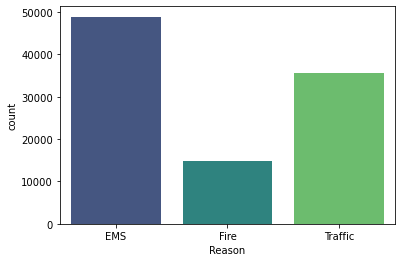

In [18]:
sns.countplot(x='Reason',data=df,palette='viridis')

From this plot, we see that the number of calls is divided into three sections, the most number of calls is for the EMS and the least is for the fire. but not know what time this calls happend ?

In [19]:
df['Year'] = df['timeStamp'].apply(lambda x:x.year )

In [20]:
df['Year'].value_counts()

2016    91523
2015     7969
Name: Year, dtype: int64

In [21]:
df.sample(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Year
50242,40.214581,-75.289200,DICKERSON RD & SUMNEYTOWN PIKE; UPPER GWYNEDD;...,19454.0,FIRE ALARM,2016-04-18 11:42:01,UPPER GWYNEDD,DICKERSON RD & SUMNEYTOWN PIKE,1,Fire,2016
72741,40.235254,-75.224722,HORSHAM RD & STUMP RD; MONTGOMERY; Station 34...,18936.0,SEIZURES,2016-06-16 10:52:01,MONTGOMERY,HORSHAM RD & STUMP RD,1,EMS,2016


In [22]:
df['Year'].value_counts()

2016    91523
2015     7969
Name: Year, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

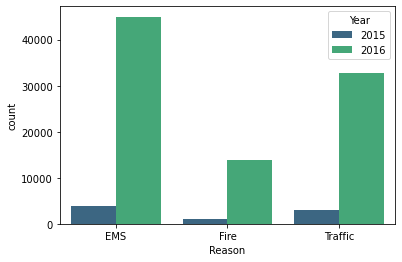

In [23]:
sns.countplot(x='Reason',data=df,palette='viridis',hue='Year')

As we can see in the plot shown, the number of calls in 2015 is less than the number of calls in 2016, and this means that this data will start from the end of 2015.

Now let's see what's the most hours happens this calls in it

In [27]:
df['Hour'] = df['timeStamp'].apply(lambda x:x.hour )

In [28]:
df.sample(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Year,Hour
4327,40.200770,-75.346051,EXTENSION PENNSYLVANIA TPKE & BETHEL RD OVERPA...,19446.0,VEHICLE ACCIDENT,2015-12-22 11:07:00,WORCESTER,EXTENSION PENNSYLVANIA TPKE & BETHEL RD OVERPASS,1,Fire,2015,11
45837,40.120942,-75.068772,WELSH RD & WALTON RD; LOWER MORELAND; Station...,19006.0,HEMORRHAGING,2016-04-05 17:47:01,LOWER MORELAND,WELSH RD & WALTON RD,1,EMS,2016,17


In [29]:
df['Hour'].value_counts()

17    6517
16    6490
15    6154
12    6029
14    5997
13    5967
18    5762
11    5543
10    5413
9     5314
8     5044
19    4908
20    4377
7     3970
21    3788
22    3283
23    2559
6     2513
0     2112
1     1721
5     1629
2     1549
3     1435
4     1418
Name: Hour, dtype: int64

<AxesSubplot:xlabel='Hour', ylabel='count'>

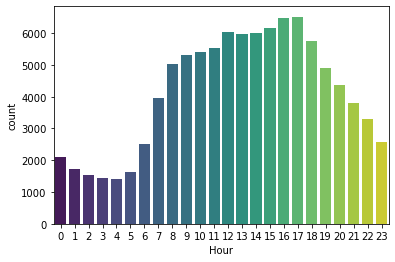

In [30]:
sns.countplot(x='Hour',data=df,palette='viridis')

So, Calls increase from 11 to 18 o'clock and the most two hours they have calls are 16 and 17

Now let's see plot by day of the weeks

In [31]:
df['Day of week'] = df['timeStamp'].apply(lambda x:x.dayofweek)

In [32]:
df.sample(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Year,Hour,Day of week
22183,40.255190,-75.283446,MOYERS RD; LANSDALE; Station 345; 2016-02-03 ...,19446.0,VEHICLE ACCIDENT,2016-02-03 12:07:00,LANSDALE,MOYERS RD,1,EMS,2016,12,2
86769,40.248927,-75.640430,HALE ST & SPRUCE ALY; POTTSTOWN; Station 329;...,19464.0,GENERAL WEAKNESS,2016-07-23 13:46:00,POTTSTOWN,HALE ST & SPRUCE ALY,1,EMS,2016,13,5


In [33]:
daymap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [34]:
df['Day of week']= df['Day of week'].map(daymap)

In [35]:
df.sample(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Year,Hour,Day of week
23111,40.174276,-75.106839,; HATBORO; 2016-02-05 @ 17:34:08;,NaN,DISABLED VEHICLE -,2016-02-05 17:37:01,HATBORO,NaN,1,Traffic,2016,17,Fri
18078,40.085489,-75.125020,E TOWNSHIP LINE RD & MEETINGHOUSE RD; CHELTENH...,19027.0,DISABLED VEHICLE -,2016-01-24 19:42:01,CHELTENHAM,E TOWNSHIP LINE RD & MEETINGHOUSE RD,1,Traffic,2016,19,Sun


<AxesSubplot:xlabel='Day of week', ylabel='count'>

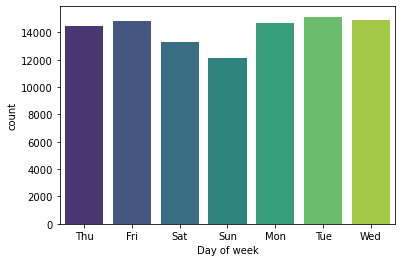

In [36]:
sns.countplot(x='Day of week',data=df,palette='viridis')

The calls are distributed on a regular basis, which means that the number of calls is close every day

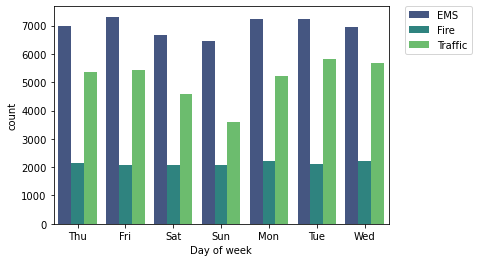

In [38]:
sns.countplot(x='Day of week',data=df,palette='viridis',hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The EMS most call during all weekdays and Fire calls happens on a regular basis and the least between the reasons

Let's plot the same data but by months

In [39]:
df['Month'] =df['timeStamp'].apply(lambda x:x.month)

In [40]:
df.sample(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Year,Hour,Day of week,Month
96770,40.090097,-75.126584,OLD YORK RD & YORK RD; ABINGTON; Station 382;...,19046.0,CARDIAC EMERGENCY,2016-08-17 10:41:41,ABINGTON,OLD YORK RD & YORK RD,1,EMS,2016,10,Wed,8
43790,40.172314,-75.492728,RT422 & RAMP RT29 TO RT422 EB; UPPER PROVIDEN...,NaN,VEHICLE ACCIDENT -,2016-04-01 05:56:00,UPPER PROVIDENCE,RT422 & RAMP RT29 TO RT422 EB,1,Traffic,2016,5,Fri,4


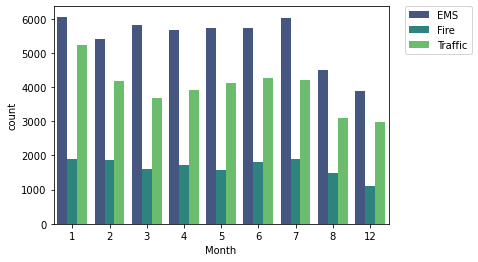

In [41]:
sns.countplot(x='Month',data=df,palette='viridis',hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Now we see some missing months. [9 , 10 ,11]

we need to fill missing information by another plot

In [42]:
ByMonth =df.groupby('Month').count()

In [43]:
ByMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Year,Hour,Day of week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


<AxesSubplot:xlabel='Month'>

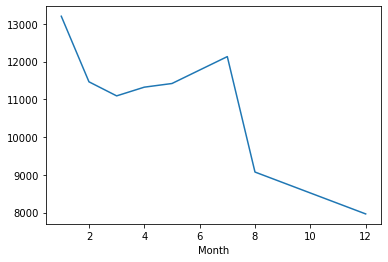

In [44]:
ByMonth['twp'].plot()

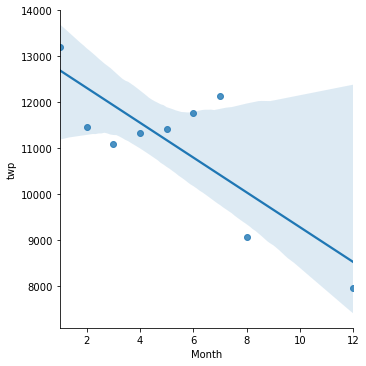

In [45]:
sns.lmplot(data=ByMonth.reset_index(),x='Month',y='twp')

In [46]:
df['timeStamp'] = df['timeStamp'].apply(lambda x:x.date())

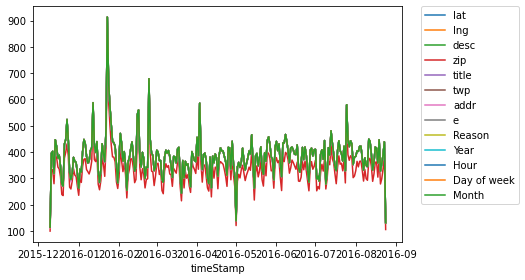

In [50]:
df.groupby('timeStamp').count().plot()
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Now see for every Reason

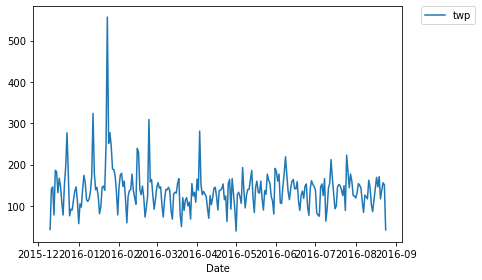

In [59]:
df[df['Reason']== 'Traffic'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

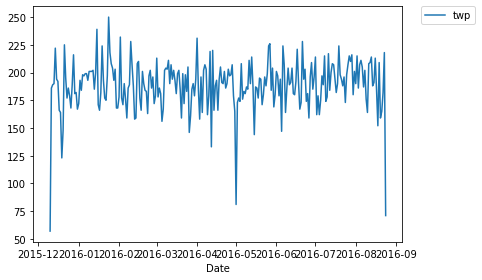

In [60]:
df[df['Reason']== 'EMS'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

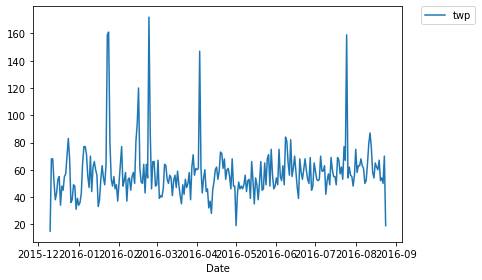

In [61]:
df[df['Reason']== 'Fire'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

as we expected From this 3 plot's we know every reason and number of calls happend by date and as we see it look EMS calls is very common calls.

Now let's see heatmap and clustermap for hours per day of week

In [51]:
G = df.groupby(by=['Day of week','Hour'])['twp'].count().unstack()

In [52]:
G.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Mon,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Sat,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sun,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354


<AxesSubplot:xlabel='Hour', ylabel='Day of week'>

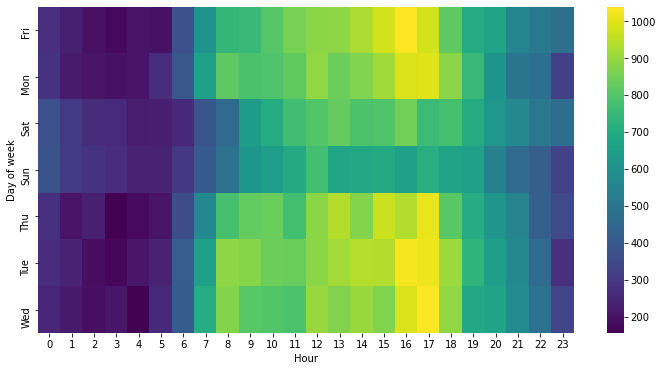

In [55]:
plt.figure(figsize=(12,6))
sns.heatmap(G, cmap='viridis')

This Heat Map is displaying the dates and times whereby the calls is most happened . With this, we’re able to immediately identify which days and hours are busiest. it’s clear that the calls experiences an influx of calls on all weekday’s exept weekend beginning at 7:00 AM, which slowly dissipates throughout the daylight. with minor daily variances (for example, Saturday’s tend to experience prolonged periods of calls, whereas Sunday’s tend to be lighter).

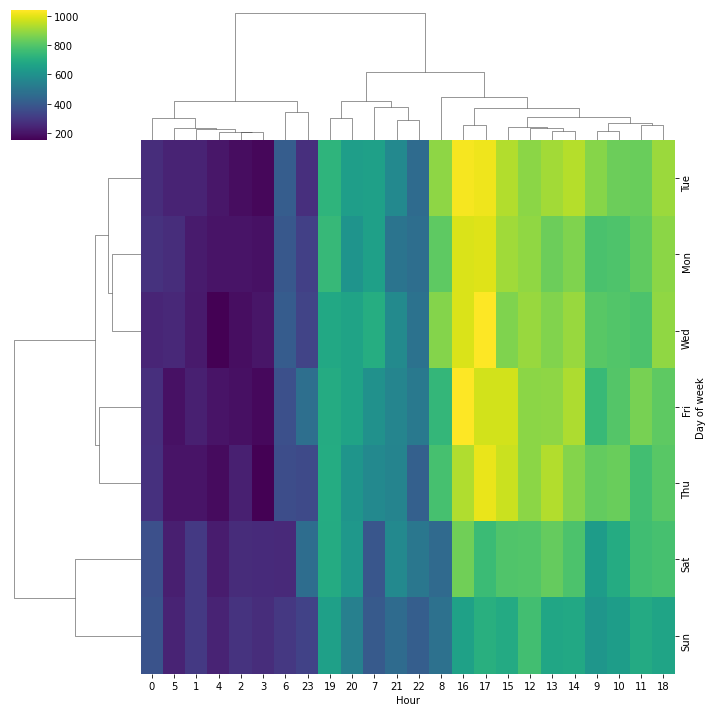

In [54]:
sns.clustermap(G,cmap='viridis')

Every two hours are the same in their data numbers next to each other, and every two days of the week are similar in their data numbers next to each other, From this we see what are the days in which the calls are more frequent and the hours in which the number of the largest and smallest calls takes place.

Now we need to see heatmap and clustermap but day of week per month

In [56]:
M = df.groupby(by=['Day of week','Month'])['twp'].count().unstack()

In [57]:
M.head()

Month,1,2,3,4,5,6,7,8,12
Day of week,,,,,,,,,
Fri,1970,1581,1523,1958,1730,1649,2045,1310,1064
Mon,1727,1964,1533,1597,1779,1617,1692,1509,1256
Sat,2290,1440,1264,1732,1444,1388,1695,1099,978
Sun,1960,1229,1100,1488,1422,1331,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1227,1265


<AxesSubplot:xlabel='Month', ylabel='Day of week'>

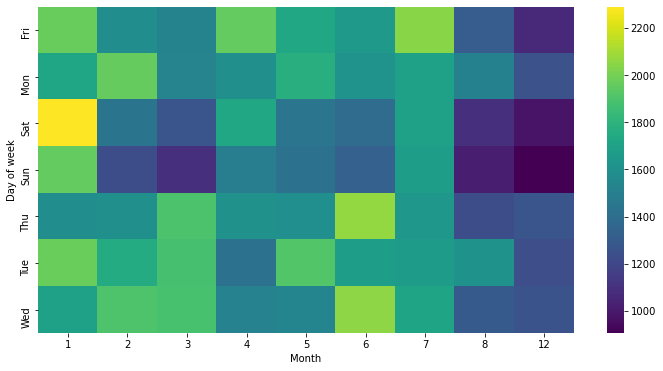

In [58]:
plt.figure(figsize=(12,6))
sns.heatmap(M,cmap='viridis')

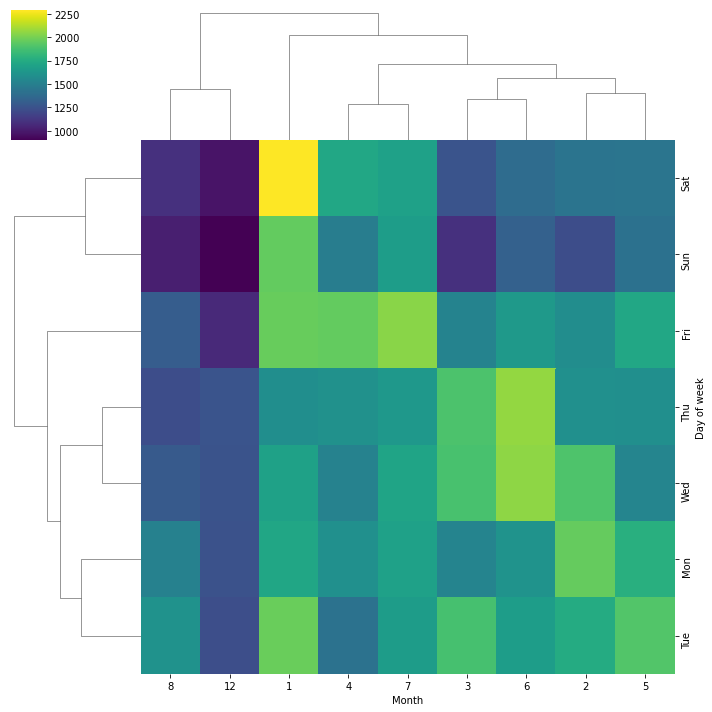

In [59]:
sns.clustermap(M,cmap='viridis')

## Now the data is ready and understand